# Hypothesis Testing Exercises

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

Simulation Based Approach
Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.
- Theory: Our population is the 1000 tickets we have manufactured
- Implementation: Create a boolean pandas Series
    - we model win with true and lose with false 
    - because of this, we can take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.25


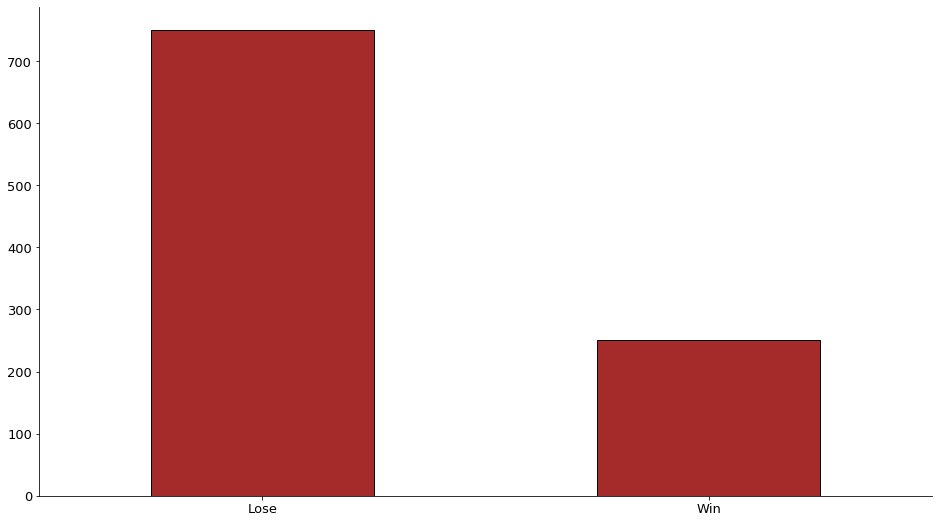

In [7]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar(color='brown')
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

Scenario: Each student in a classroom is given a Golden Cody scratch off at random
Theory

We we take a random sample and calculate the win rate, we won't expect to see exactly 25% even though we know that is what the overall rate is.

Examples of biased samples:

1. non-response: people that don't respond are a diff population
2. undercoverage: some groups aren't well represented
3. voluntary: people volunteer for surveys
4. leading questions
5. social desirability
Implementation: Use the `.sample` method on our series to randomly choose 25 tickets, representing 25 students in a classroom. Use `.mean` to calculate what percentage of the values are True, or are winning tickets.

In [12]:
n = 25
tickets.sample(n).mean()

0.24

Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, we want to calculate the win rate for each classroom.

Theory: it is unlikely any classroom will have exactly a 25% winrate, instead we will see slightly different numbers for each classroom.

Implementation: loop through a range of 5 to get a sample and calculate the winrate 5 times. Each of the 5 numbers produced represents the calculated winrate for one classroom of 25 students.

In [13]:
[tickets.sample(n).mean() for _ in range(5)]

[0.36, 0.2, 0.4, 0.12, 0.16]

Theory

The winrates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% than further away. That is, it is more likely that a classroom will come up with a win rate of 24% than a winrate of 10%.

If we were to repeat this experiment a whole bunch of times, say 10,000, we would find that the calculated winrates are, in fact, normally distributed.

That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, even though the underlying random process is not based on a normal distribution

Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, each classroom made up of 25 students. That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys and calculate the average winrate for each of the 10,000 classrooms.

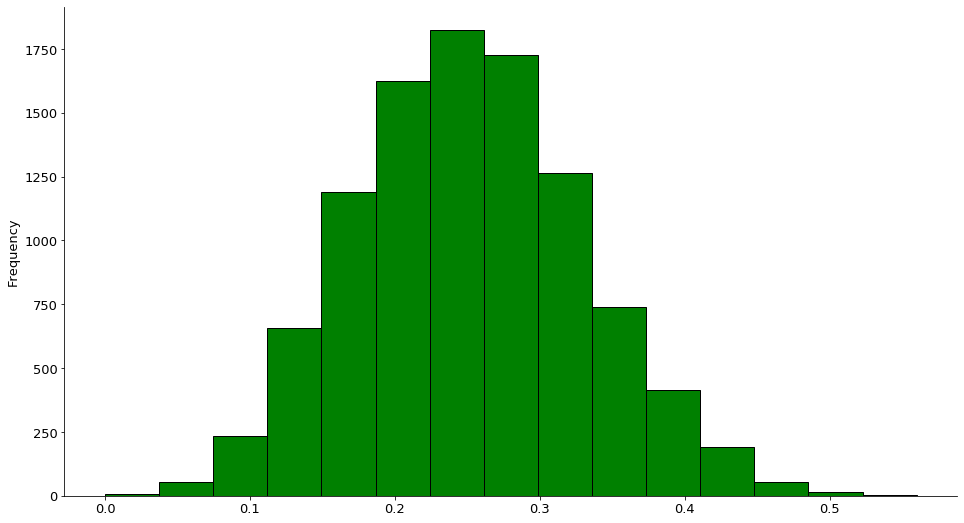

In [15]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15, color='green')

Theory

The above visual represents the sampling distribution for the winrate of Golden Codys, based on a class of 25.

The Central Limit Theorm says that sampling distribution will be normally distributed even if the underlying random variable isn't.

# Mini Exercise -- CLT
Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.

Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.

Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

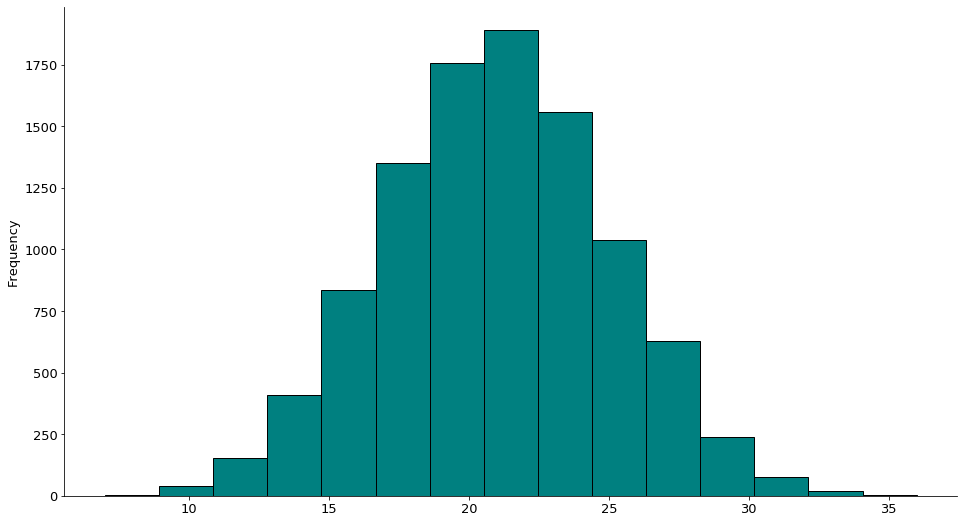

In [23]:
# Theoretical expected value for average of the sum of 6 dice rolls = 6 * 3.5 = 21
n_trials = 10_000
n_dice = 6

ten_thousand_rolls = pd.Series(np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(n_trials, n_dice).sum(axis=1))
ten_thousand_rolls.plot.hist(bins=15, color='teal')

In [24]:
# The shape of the distribution of the calculated averages is normal (demonstration of central limit theorem)
# Even though the underlying distribution of the random variable (a dice roll) is not normal (uniform distribution)

# END MINI EXERCISE

Theory: in practice, we won't have 10,000 samples to work with, but rather just 1. We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.

- the mean of the sampling distribution of the sample means will be the "true" mean
- the variance of the sampling distribution is the population variable divided by the sample size
- the standard deviation of the sampling distribution is $sqrt((p*q)/n)$ (for our example), aka the standard error

In [26]:
se = math.sqrt((.25 * .75) / n)

Let's compare our calculated standard error (i.e. the standard deviation of the sample means) to the experimental value:

In [29]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0847


That the sampling distribution being normally distributed is very powerful and has important implications:

- confidence intervals for population parameter estimates (e.g. estimating the population mean)
    - as n goes up, interval becomes smaller
    - as certainty goes up, interval becomes larger
    - 99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean)
- hypothesis testing
    - One classroom calculates their winrate at 10% and claims the tickets were distributed unfairly. What is the likelihood we observe a 10% (or smaller) winrate just due to chance?

In [33]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.10)

0.03910157327025599

The probability we've calculated is a p-value. The likelihood that we observe the data that we have if the null hypothesis is true.

Null and Alternative Hypothesis

- H0 : status quo: no difference or no effect

- Ha : alternative: there is a difference or effect
- whether Ha is ≠, <, >, determines one-tailed vs two-tailed test
    - < or > == one-tailed
    - ≠ == two-tailed
    
Hypothesis Testing Results

- TN
- FN (Type II)
- FP (Type I)
- TP

#### Mini Exercise -- Null + Alternate Hypothesis and Errors

For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.

1. Are the average grades in web development vs data science classes different?
2. Is there a relationship between how early a student shows up to class and their grade?
3. Are web dev or data science students more likely to be coffee drinkers?
4. Has the network latency gone up since we switched internet service providers?
5. Is the website redesign any good?
6. Is our television ad driving more sales?

# T-Test Exercises

# Correlation Exercises

#### QUESTION ONE
#### Use the telco_churn data. 

In [36]:
data = pd.read_csv('cust_churn_telco.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 1a. Does tenure correlate with monthly charges?

In [37]:
n = data.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [38]:
x = data.tenure
y = data.MonthlyCharges
corr, p = stats.pearsonr(x, y)
corr, p

(0.24789985628615002, 4.0940449915016345e-99)

There is a moderate positive correlation between tenure and monthly charges at p < .01.

#### 1b. Total charges? 

In [46]:
# Because there are null values in Total Charges, we will need to replace them. 
# For convenience, they will be replaced with the mean of Total Charges
mean_to_chgs = round(data.TotalCharges.mean(), 2)
data['TotalCharges'].fillna(mean_to_chgs, inplace=True)
y = data.TotalCharges
corr, p = stats.pearsonr(x, y)
corr, p

(0.8247573160358319, 0.0)

There is a strong positive correlation between tenure and total charges at p < .01

#### 1c. What happens if you control for phone and internet service?

# Chi-Square Exercises